In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [2]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Checking missing values


In [6]:
# rename the Income($)  column
df = df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)":"Spending Score"})
df.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Encode Gender Column
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Cek Encode Column
print("Data setelah encoding 'Gender':")
print(df.head())
df.info()

Data setelah encoding 'Gender':
   CustomerID  Gender  Age  Income  Spending Score
0           1       0   19      15              39
1           2       0   21      15              81
2           3       1   20      16               6
3           4       1   23      16              77
4           5       1   31      17              40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      200 non-null    int64
 1   Gender          200 non-null    int64
 2   Age             200 non-null    int64
 3   Income          200 non-null    int64
 4   Spending Score  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


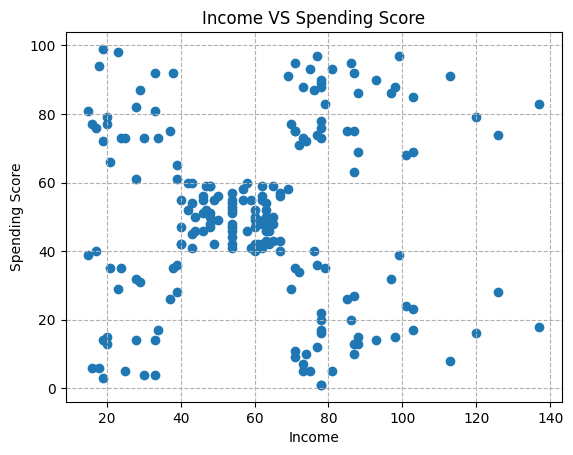

In [8]:
plt.scatter(df['Income'], df['Spending Score'])
plt.title('Income VS Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

Correlation between Income VS Spending Score
This graph shows the relationship between a customer's annual income (Income) and their spending score (Spending Score). The distribution of the dots shows that:
- There is no clear linear relationship between income and spending score.
- Customers with high incomes do not always have high spending scores.
- Conversely, some customers with low incomes actually have high spending scores.

This pattern indicates that income level is not the only factor influencing customer spending behavior.
Other factors such as age, lifestyle preferences, or gender may also play a significant role.


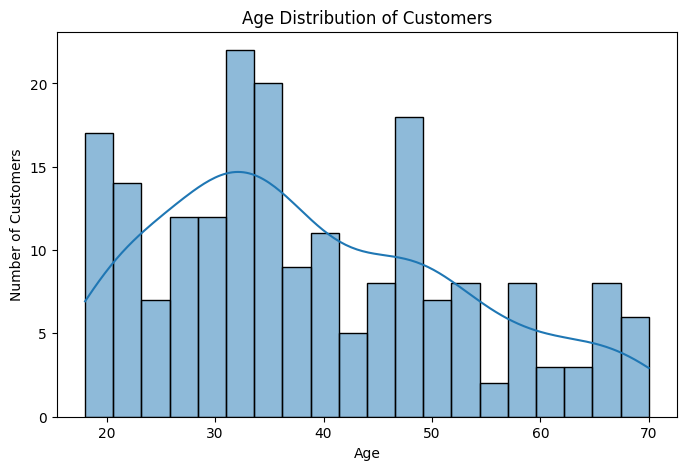

In [9]:
# Distribution of Customer Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


Customer Age Distribution: The graph above shows the age distribution of customers in the Mall Customers dataset. It can be seen that most customers are between the ages of 25 and 40, with a peak around 30–35.

- The majority of mall customers are young adults, an age group that is typically more active in shopping and following lifestyle trends.
- This could be an indication for mall management or marketing teams to focus on promotions, events, or products relevant to young and productive age groups.
- Older age groups may require different strategies, such as promotions based on convenience or family needs.

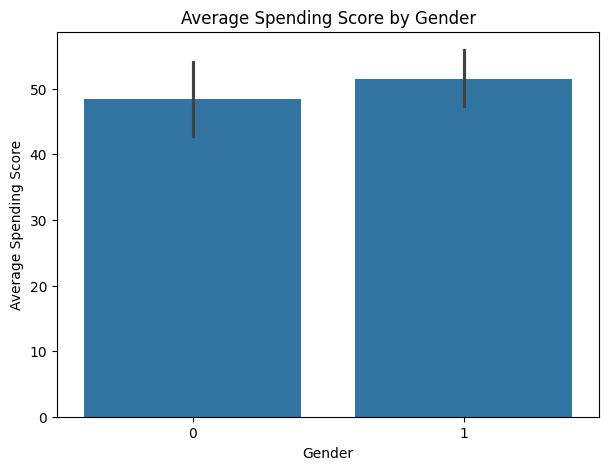

In [10]:
plt.figure(figsize=(7,5))
sns.barplot(x='Gender', y='Spending Score', data=df, estimator='mean')
plt.title('Average Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.show()


The graph above displays the average Spending Score based on customer gender.
The results show that Customers labeled 1 (Female) have a higher average spending score than customers labeled 0 (Male).

This difference indicates that female customers tend to have more active shopping behavior or higher spending.

This finding is important for marketing teams because it can inform more targeted promotional strategies, for example:
- Developing campaigns targeting female customers,
- Offering fashion, lifestyle, or beauty products with special discounts.

# Data Scaling using Standard Scaler

        Age    Income  Spending Score
0 -1.424569 -1.738999       -0.434801
1 -1.281035 -1.738999        1.195704
2 -1.352802 -1.700830       -1.715913
3 -1.137502 -1.700830        1.040418
4 -0.563369 -1.662660       -0.395980


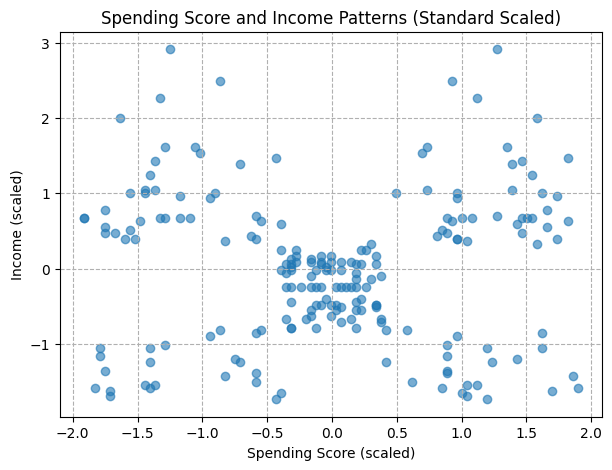

In [11]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Pilih kolom yang relevan untuk clustering
features = df[['Age', 'Income', 'Spending Score']]

# Lakukan scaling
sc = StandardScaler()
scaled_features = sc.fit_transform(features)

# Buat DataFrame hasil scaling
df_sc_scaled = pd.DataFrame(scaled_features, columns=['Age', 'Income', 'Spending Score'])

# Lihat hasil scaling
print(df_sc_scaled.head())

# Visualisasi
plt.figure(figsize=(7,5))
plt.scatter(df_sc_scaled["Spending Score"], df_sc_scaled["Income"], alpha=0.6)
plt.xlabel("Spending Score (scaled)")
plt.ylabel("Income (scaled)")
plt.title("Spending Score and Income Patterns (Standard Scaled)")
plt.grid(axis='both', linestyle='--')
plt.show()


# K-Means Clustering

In [12]:
from sklearn.cluster import KMeans

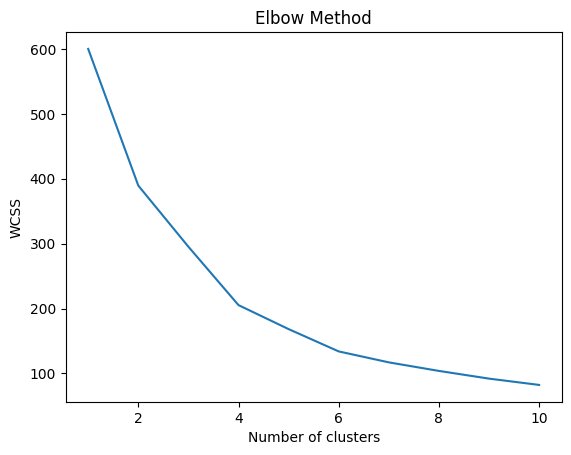

In [13]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  600.000000
1                   2  389.386189
2                   3  295.212246
3                   4  205.225147
4                   5  168.247580
5                   6  133.868334
6                   7  117.011555
7                   8  103.828578
8                   9   91.956839
9                  10   82.245745


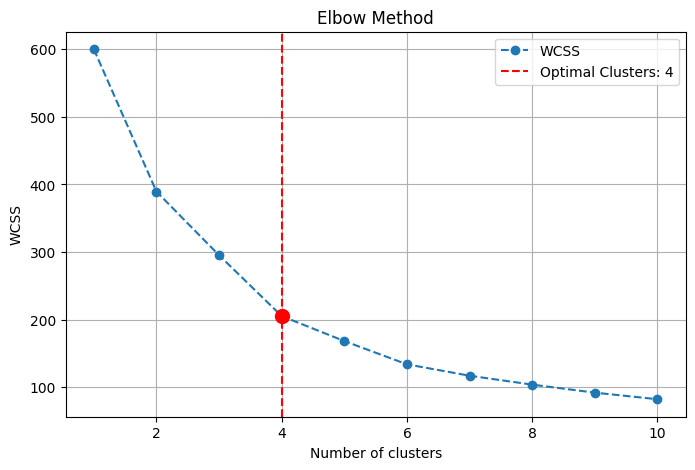

The optimal number of clusters is: 4


In [15]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [16]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,CustomerID,Gender,Age,Income,Spending Score,KMeans_Cluster
0,1,0,19,15,39,3
1,2,0,21,15,81,2
2,3,1,20,16,6,3
3,4,1,23,16,77,2
4,5,1,31,17,40,3


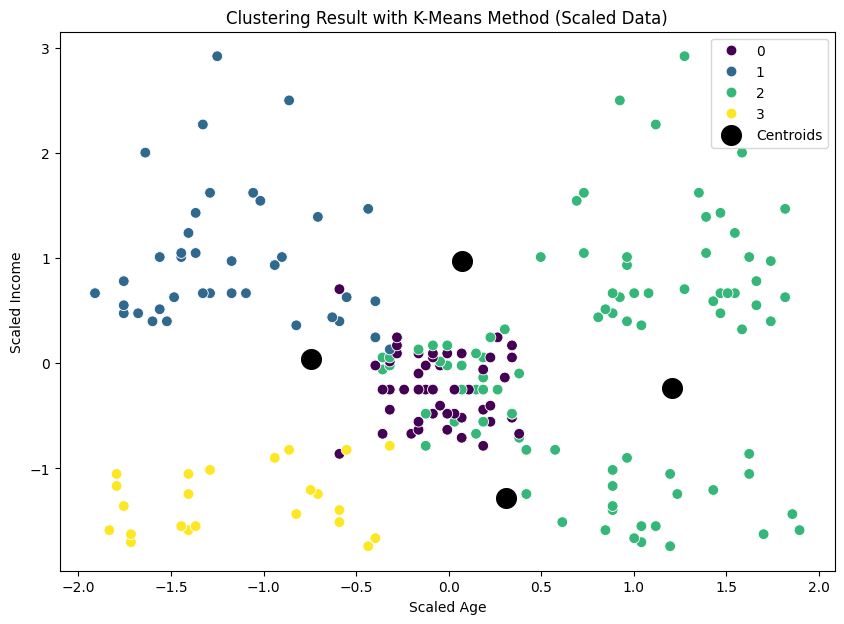

In [17]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Spending Score", y = "Income", hue=clusters, palette="viridis", data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

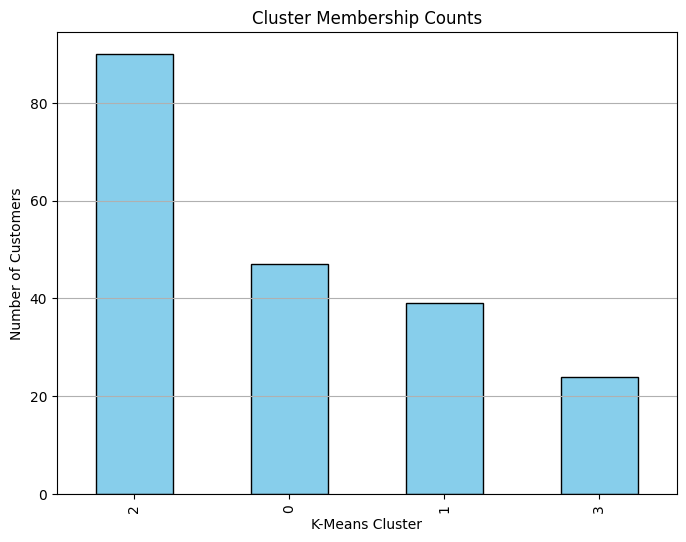

In [18]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [19]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Age': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age             Income         
                     mean min max       mean min  max
KMeans_cluster                                       
0               55.638298  40  70  54.382979  38   79
1               39.871795  19  59  86.102564  64  137
2               28.500000  18  40  61.677778  15  137
3               43.125000  19  67  26.958333  15   40

## Managerial Implications Based on the Four Clusters (Income & Spending Score)

Cluster 0 – High Income, Average Spending
Profile:
- Income: Relatively high (~$54K average).
- Spending: Moderate — not impulsive buyers.
- Tend to be financially disciplined or selective when making purchases.

Implications:
- Offer premium products with rational value propositions (quality, long-term benefit).
- Use loyalty programs or exclusive member perks to encourage higher spending.
- Highlight brand reliability and performance rather than discounts.

Cluster 1 – High Income, High Spending
Profile:
- Income: Highest among all clusters (~$86K average).
- Spending: High — tend to buy frequently and enjoy luxury or experiential products.
- Represent the most profitable customer segment.

Implications:
- Focus marketing on premium, exclusive, and personalized products or services.
- Use targeted campaigns emphasizing lifestyle, luxury, and brand prestige.
- Maintain satisfaction and loyalty through VIP experiences and priority support.

Cluster 2 – Low Income, High Spending
Profile:
- Income: Relatively low (~$61K average).
- Spending: High — impulsive or trend-driven buyers despite limited income.
- Value experiences and emotional appeal over practicality.

Implications:
- Use promotions, limited-time offers, and appealing visuals to attract interest.
- Offer flexible payment options or installment plans.
- Focus on aspirational marketing — make them feel part of an exclusive lifestyle affordably.

Cluster 3 – Low Income, Low Spending

Profile:
- Income: Lowest group (~$27K average).
- Spending: Minimal — cautious spenders or budget-conscious consumers.
- Likely prioritize essential goods and avoid luxury spending.

Implications:
- Focus on affordability, practicality, and discounts.
- Highlight functional benefits and price efficiency in communication.
- Consider low-cost bundles or “value” product lines.

## Overall Insights

The clustering reveals four distinct consumer segments based on spending behavior and purchasing power.

Marketing strategy should differentiate between premium-focused campaigns (Clusters 0–1) and value-driven strategies (Clusters 2–3).

Understanding these segments helps allocate resources effectively — e.g., customer retention programs for high-value segments and promotional offers for price-sensitive groups.